In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
df  = pd.read_csv("/Users/devrajdutta/Downloads/MLP Files/bank_cleaned.csv")

In [3]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [4]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [5]:
df  = pd.read_csv("/Users/devrajdutta/Downloads/MLP Files/bank_cleaned.csv")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.loan = le.fit_transform(df.loan)

print(df)

       Unnamed: 0  age  job  marital  education default  balance housing  \
0               0   58    4        1   tertiary      no     2143     yes   
1               1   44   10        2  secondary      no       29     yes   
2               2   33    2        1  secondary      no        2     yes   
3               5   35    4        1   tertiary      no      231     yes   
4               6   28    4        2   tertiary      no      447     yes   
...           ...  ...  ...      ...        ...     ...      ...     ...   
40836       45205   25   10        2  secondary      no      505      no   
40837       45206   51   10        1   tertiary      no      825      no   
40838       45207   71    6        0    primary      no     1729      no   
40839       45208   72    6        1  secondary      no     5715      no   
40840       45209   57    1        1  secondary      no      668      no   

       loan  day month  duration  campaign  pdays  previous poutcome response  \
0     

In [6]:
X= df[['job','marital']]

In [9]:
y = df[['loan']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_train.head()

,loan
29058,0
38366,0
28620,0
22002,0
34113,0


In [11]:
X_train.head()

,job,marital
29058,4,1
38366,10,2
28620,4,0
22002,1,1
34113,10,1


In [12]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [13]:
y_pred = knn.predict(X_test)

In [14]:
confusion_matrix(y_test, y_pred)

array([[8349,  145],
       [1673,   44]])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8219567133483499

In [16]:
from sklearn.metrics import precision_recall_fscore_support

In [17]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.83306725, 0.23280423]),
 array([0.98292913, 0.02562609]),
 array([0.90181465, 0.04616999]),
 array([8494, 1717]))

In [18]:
from sklearn.metrics import precision_score

In [19]:
precision_score(y_test, y_pred)

0.2328042328042328

In [20]:
from sklearn.metrics import recall_score

In [21]:
recall_score(y_test, y_pred)

0.0256260920209668

In [22]:
from sklearn.metrics import f1_score

In [23]:
f1_score(y_test, y_pred)

0.04616998950682057

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was pas

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was pas

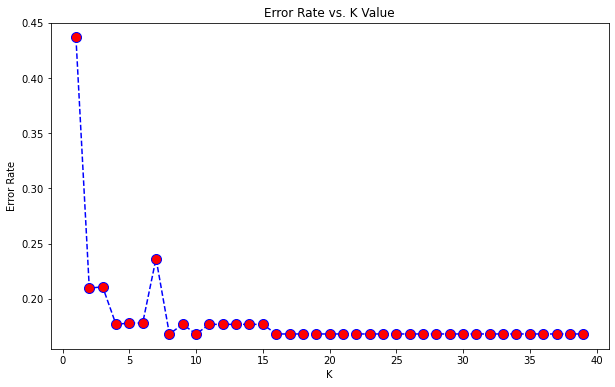

Minimum error:- 0.1681519929487807 at K = 8


In [26]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_train, y_train)

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [28]:
y_pred = knn.predict(X_test)